In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

In [89]:
domain_table = pd.read_fwf('pr9_2_profile_table.txt')
prot_table = pd.read_excel('pr9_1.xlsx')

In [90]:
domain_table.head(5)

Sequence        Description Unnamed: 2   Unnamed: 3   Score  \
0             --------        -----------        NaN          NaN   -----   
1  sp|Q7N9B2|EFG_PHOLL  Elongation factor          G  OS=Photorha  1745.5   
2  sp|Q3J8R1|EFG_NITOC  Elongation factor          G  OS=Nitrosoc  1727.6   
3  sp|A6Q1M7|EFG_NITSB  Elongation factor          G  OS=Nitratir  1715.6   
4  sp|B9MQH0|EFG_CALBD  Elongation factor          G  OS=Caldicel  1711.4   

   E-value    N  
0  -------  ---  
1        0    1  
2        0    1  
3        0    1  
4        0    1

In [91]:
domain_table = domain_table.loc[1:]

In [92]:
prot_table.head(5)

Entry                                      Protein names  Length  \
0  P13551                         Elongation factor G (EF-G)     691   
1  P0A6M8                         Elongation factor G (EF-G)     704   
2  O07631  50S ribosomal subunit assembly factor BipA (EC...     612   
3  P68790  Elongation factor G (EF-G) (85 kDa vitronectin...     693   
4  P80868  Elongation factor G (EF-G) (Vegetative protein...     692   

                     Cross-reference (Pfam)                        Organism  \
0  PF00679;PF14492;PF03764;PF00009;PF03144;            Thermus thermophilus   
1  PF00679;PF14492;PF03764;PF00009;PF03144;   Escherichia coli (strain K12)   
2          PF00679;PF14492;PF00009;PF03144;  Bacillus subtilis (strain 168)   
3  PF00679;PF14492;PF03764;PF00009;PF03144;           Staphylococcus aureus   
4  PF00679;PF14492;PF03764;PF00009;PF03144;  Bacillus subtilis (strain 168)   

  Taxonomic lineage (PHYLUM) Taxonomic lineage (FAMILY)  \
0        Deinococcus-Thermus                 Thermaceae   
1             Proteobacteria         Enterobacteriaceae   
2                 Firmicutes                Bacillaceae   
3                 Firmicutes          Staphylococcaceae   
4                 Firmicutes                Bacillaceae   

  Taxonomic lineage (GENUS)  Entry name    Status                 Gene names  
0                   Thermus   EFG_THETH  reviewed                   fusA fus  
1               Escherichia   EFG_ECOLI  reviewed  fusA far fus b3340 JW3302  
2                  Bacillus  BIPA_BACSU  reviewed    bipA typA ylaG BSU14770  
3            Staphylococcus   EFG_STAAU  reviewed                   fusA fus  
4                  Bacillus   EFG_BACSU  reviewed          fusA fus BSU01120

In [93]:
def is_normal(obj):
    if type(obj) == str:
        ans = True
    else:
        ans = False
    return(ans)
domain_table = domain_table[domain_table['Sequence'].apply(is_normal)]
def ID_change(string):
    string = string[-9:]
    return(string)
domain_table['Sequence'] = domain_table['Sequence'].apply(ID_change)
def is_nan(obj):
    return(not(obj is np.NaN))
for col in domain_table:
    domain_table = domain_table[domain_table[col].apply(is_nan)]
domain_table = domain_table[:len(domain_table) - 1]
def is_in_prot_table(string):
    if string in prot_table['Entry name'].values:
        ans = True
    else:
        ans = False
    return(ans)
domain_table['Is_in_prot_table'] = domain_table['Sequence'].apply(is_in_prot_table)

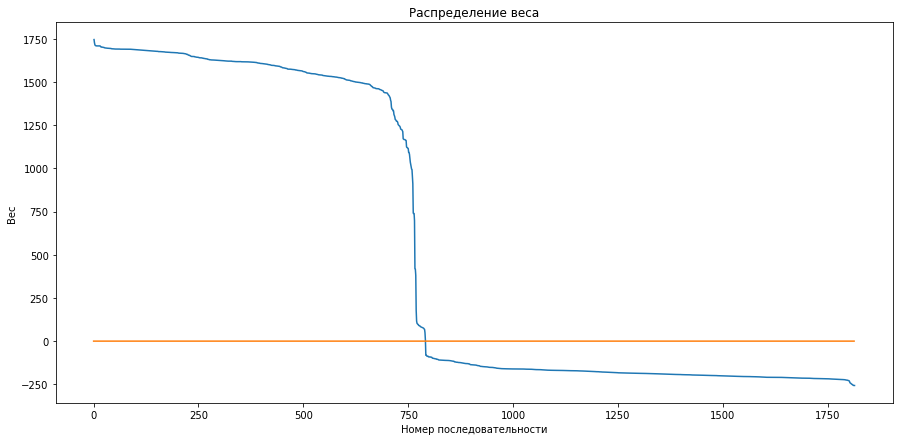

In [115]:
def is_number(obj):
    try:
        obj = float(obj)
    except ValueError:
        obj = float('inf')
    return(obj)
domain_table['Score'] = domain_table['Score'].apply(is_number)
domain_table = domain_table[domain_table['Score'] != float('inf')]
pt.figure(figsize = (15, 7))
pt.plot(domain_table['Score'])
pt.plot([0]*len(domain_table))
pt.title('Распределение веса')
pt.xlabel('Номер последовательности')
pt.ylabel('Вес')
pt.show()

In [131]:
domain_table.index = range(len(domain_table))
domain_table['TN'] = 0
index_list = domain_table[domain_table['Is_in_prot_table'] == False].index
last = 0
for i in range(len(index_list)):
    domain_table.loc[range(last, index_list[i]), ['TN']] = len(index_list[i:])
    last = index_list[i]
domain_table['TP'] = 0
index_list = domain_table[domain_table['Is_in_prot_table'] == True].index.tolist()
index_list.append(len(domain_table))
last = 0
for i in range(len(index_list)):
    domain_table.loc[range(last, index_list[i]), ['TP']] = len(index_list[:i])
    last = index_list[i]
domain_table['FN'] = 0
index_list = domain_table[domain_table['Is_in_prot_table'] == True].index
last = 0
for i in range(len(index_list)):
    domain_table.loc[range(last, index_list[i]), ['FN']] = len(index_list[i:])
    last = index_list[i]
domain_table['FP'] = 0
index_list = domain_table[domain_table['Is_in_prot_table'] == False].index.tolist()
index_list.append(len(domain_table))
last = 0
for i in range(len(index_list)):
    domain_table.loc[range(last, index_list[i]), ['FP']] = len(index_list[:i])
    last = index_list[i]

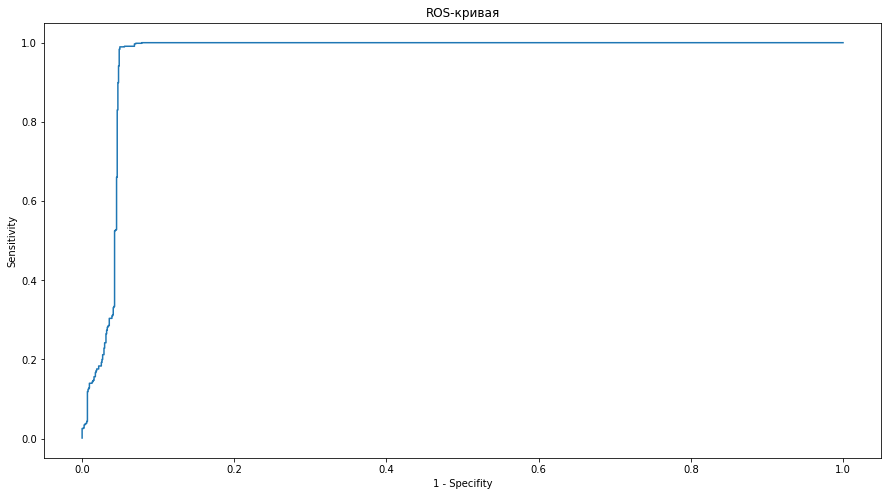

In [141]:
domain_table['1 - Specifity'] = 1 - domain_table['TN']/(domain_table['TN'] + domain_table['FP'])
domain_table['Sensitivity'] = domain_table['TP']/(domain_table['TP'] + domain_table['FN'])
pt.figure(figsize = (15, 8))
pt.plot(domain_table['1 - Specifity'], domain_table['Sensitivity'])
pt.title('ROS-кривая')
pt.xlabel('1 - Specifity')
pt.ylabel('Sensitivity')
pt.show()

In [143]:
domain_table['Precision'] = domain_table['TP']/(domain_table['TP'] + domain_table['FP'])
domain_table['F1 score'] = 2*domain_table['Sensitivity']*domain_table['Precision']/(domain_table['Sensitivity'] + domain_table['Precision'])
domain_table[domain_table['F1 score'] == max(domain_table['F1 score'])]

Sequence        Description Unnamed: 2   Unnamed: 3   Score E-value  N  \
714  EFG_DEHMB  Elongation factor          G  OS=Dehaloco  1333.0       0  1   

     Is_in_prot_table    TN   TP  FN  FP  1 - Specifity  Sensitivity  \
714              True  1092  658   7  57       0.049608     0.989474   

     Precision  F1 score  
714    0.92028  0.953623

In [144]:
pd.crosstab((domain_table['Score'] > 1333), domain_table['Is_in_prot_table'])

Is_in_prot_table  False  True 
Score                         
False              1092      9
True                 57    656